In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'age', 'excel', 'sql', 'python', 'tableau', 'word', 'crm'],
      dtype='object')

### Job title and seniority

In [4]:
def title_simplifier(title):
    if 'business analyst' in title.lower():
        return 'business analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'marketing analyst' in title.lower():
        return 'marketing analyst'
    elif 'financial analyst' in title.lower():
        return 'financial analyst'
    elif 'analyst' in title.lower():
        return 'analyst'
    else:
        return 'na'

def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() :
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower() or 'entry' in title.lower():
        return 'junior'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,age,excel,sql,python,tableau,word,crm,job_simp,seniority
0,Business Analyst,$33K-$66K (Glassdoor est.),We are looking for a Business Analyst to join ...,3.1,Onyx Enterprises Int'l\n3.1,"Cranbury, NJ",-1,201 to 500 Employees,2008,Company - Private,...,NJ,12,1,0,0,0,0,0,business analyst,na
1,Business Intelligence Analyst & Developer,$33K-$66K (Glassdoor est.),Overview\n\n\nEveryone wants to work with peop...,4.4,The David J. Joseph Company\n4.4,"Cincinnati, OH",-1,201 to 500 Employees,1885,Subsidiary or Business Segment,...,OH,135,0,1,1,1,0,0,analyst,na
2,CCS Business Performance Analyst,$33K-$66K (Glassdoor est.),Harland Clarke is a leading provider of custom...,3.5,Harland Clarke Corp.\n3.5,"San Antonio, TX",-1,1001 to 5000 Employees,1874,Subsidiary or Business Segment,...,TX,146,1,0,0,0,0,0,analyst,na
3,Loan Review Analyst,$33K-$66K (Glassdoor est.),Duties/Responsibilities:\n• Review commercial ...,3.2,Busey Bank\n3.2,"Champaign, IL",-1,1001 to 5000 Employees,1979,Company - Public,...,IL,41,0,0,0,0,0,0,analyst,na
4,Applications Systems Analyst,$33K-$66K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nBecom...",4.2,ManTech International Corporation\n4.2,"Clarksburg, WV",-1,5001 to 10000 Employees,1968,Company - Public,...,WV,52,0,0,0,0,0,0,analyst,na


In [7]:
df['seniority'].value_counts()

na        749
senior    198
junior      3
Name: seniority, dtype: int64

### Job description length

In [8]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2717
1      5211
2      6697
3      1430
4      3641
       ... 
945    3900
946    5432
947    3404
948    3775
949    5873
Name: desc_len, Length: 950, dtype: int64

In [9]:
df['company_name'] = df['company_name'].apply(lambda x: x.replace('\n',''))
df['company_name'] 

0                 Onyx Enterprises Int'l
1            The David J. Joseph Company
2                   Harland Clarke Corp.
3                             Busey Bank
4      ManTech International Corporation
                     ...                
945            Pattern Energy Group Inc.
946                       Citigroup Inc.
947             RxLogix Corporation, Inc
948           Distributed Solutions, Inc
949                           5.11, Inc.
Name: company_name, Length: 950, dtype: object

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'age', 'excel', 'sql', 'python', 'tableau', 'word', 'crm', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

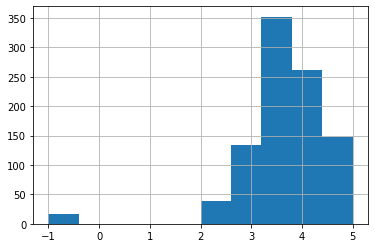

In [11]:
df.Rating.hist()

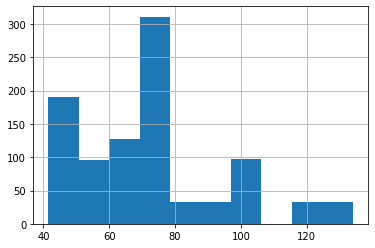

In [12]:
df.avg_salary.hist()

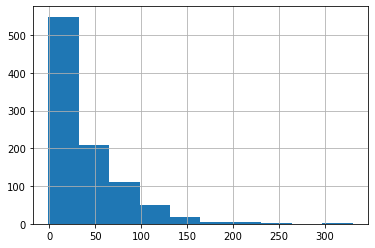

In [13]:
df.age.hist()

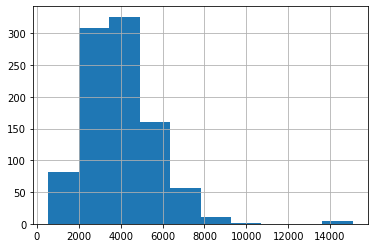

In [14]:
df.desc_len.hist()

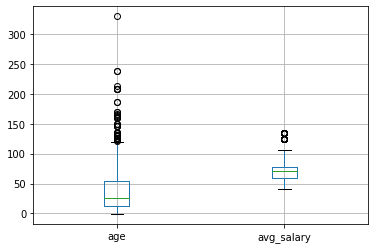

In [15]:
df.boxplot(column = ['age','avg_salary'])

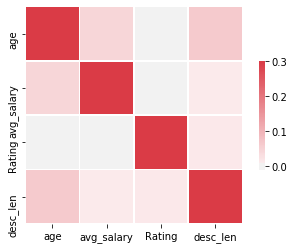

In [16]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'age', 'excel', 'sql', 'python', 'tableau', 'word', 'crm', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [18]:
df_cat = df[['Location','Size','Type of ownership','Industry','Sector','Revenue','company_name','job_state','excel','sql','python','tableau','word','crm']]

graph for Location: total = 347


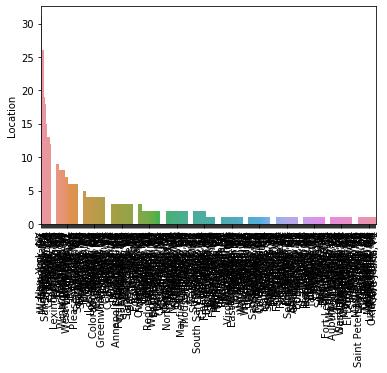

graph for Size: total = 9


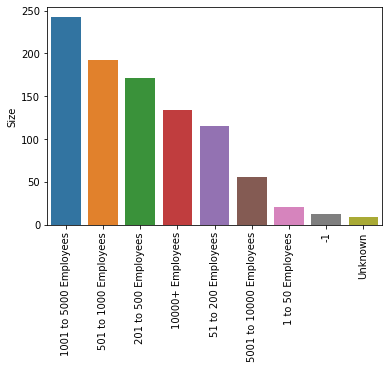

graph for Type of ownership: total = 14


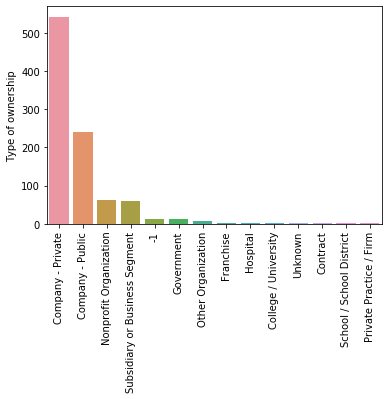

graph for Industry: total = 75


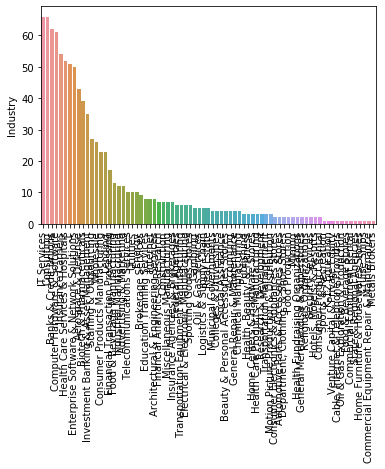

graph for Sector: total = 25


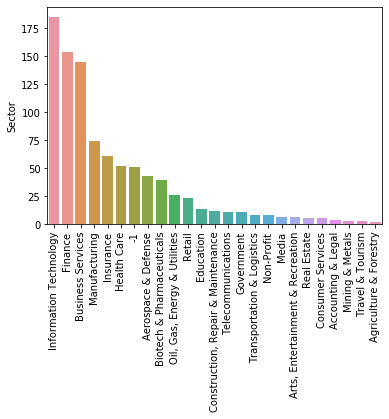

graph for Revenue: total = 14


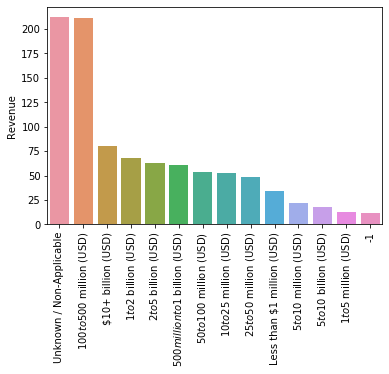

graph for company_name: total = 515


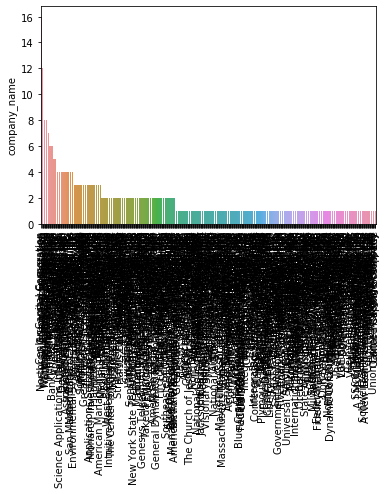

graph for job_state: total = 46


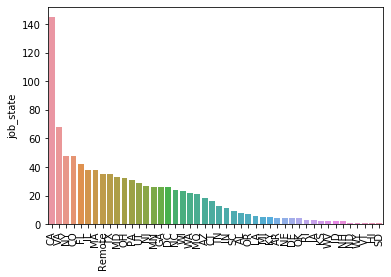

graph for excel: total = 2


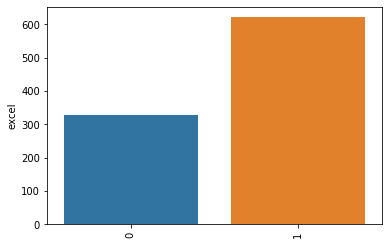

graph for sql: total = 2


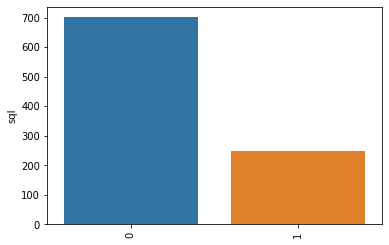

graph for python: total = 2


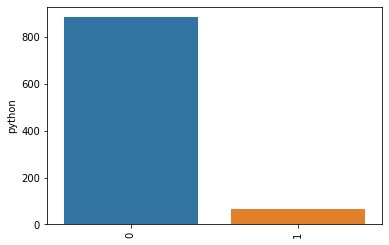

graph for tableau: total = 2


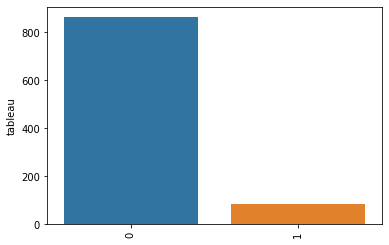

graph for word: total = 2


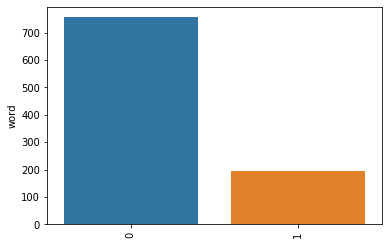

graph for crm: total = 2


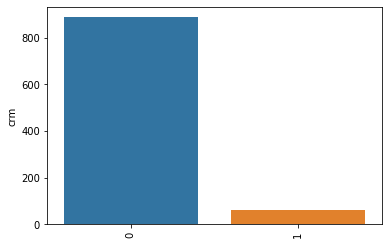

In [19]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index , y=cat_num )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


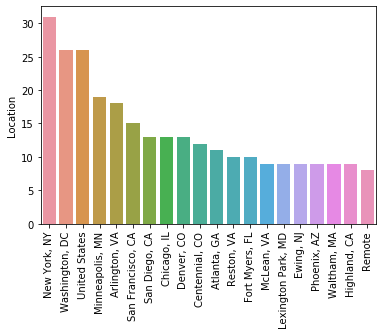

graph for company_name: total = 20


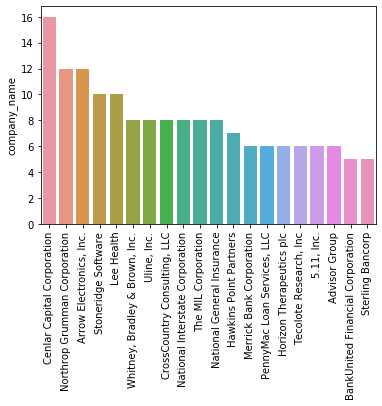

graph for Industry: total = 20


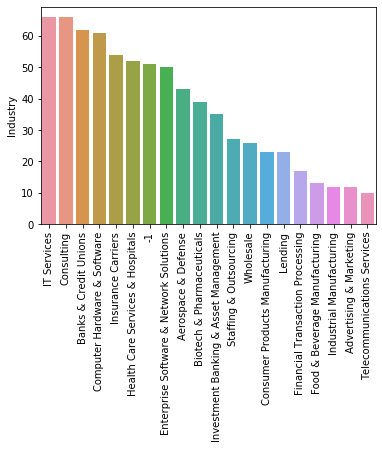

In [20]:
for i in df_cat[['Location','company_name','Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index , y=cat_num )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'age', 'excel', 'sql', 'python', 'tableau', 'word', 'crm', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [22]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp          seniority            
analyst           junior      59.750000
                  na          74.056763
                  senior      73.281250
business analyst  na          73.105991
                  senior      74.402439
data analyst      junior      68.500000
                  na          74.529412
                  senior      78.545455
director          na          76.166667
financial analyst na          67.987805
                  senior      60.125000
manager           na          75.550000
                  senior      85.000000
marketing analyst na          71.125000
                  senior      83.333333
na                na          74.750000
                  senior      71.400000

In [23]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [24]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                     
WY        data analyst                1
WV        analyst                     2
WI        financial analyst           1
          business analyst            9
          analyst                    13
WA        manager                     5
          data analyst                3
          analyst                    10
          na                          4
VT        analyst                     1
VA        na                          2
          manager                     1
          financial analyst           2
          data analyst                1
          business analyst           24
          analyst                    38
UT        data analyst                4
          analyst                    13
          business analyst           10
          manager                     1
          financial analyst           1
TX        na                          2
          business analyst            9
          analyst                    24
TN        na                          1
          financial analyst           4
          business analyst            4
          analyst                     4
SD        analyst                     1
SC        na                          1
          data analyst                2
          analyst                     6
Remote    financial analyst           2
          analyst                    16
          business analyst            3
          data analyst                2
          na                         11
          manager                     1
RI        na                          1
          marketing analyst           2
PA        data analyst                6
          business analyst            5
          analyst                    20
OR        analyst                     7
OK        business analyst            2
          analyst                     2
OH        business analyst           12
          analyst                    20
NY        business analyst           17
          director                    1
          analyst                    23
          data analyst                3
          financial analyst           1
          marketing analyst           1
          na                          2
NJ        financial analyst           1
          data analyst                1
          business analyst           13
          analyst                    12
NH        financial analyst           1
          business analyst            1
NE        na                          2
          marketing analyst           2
ND        analyst                     1
NC        manager                     1
          financial analyst           2
          business analyst            4
          analyst                    17
MO        analyst                    17
          financial analyst           1
          business analyst            3
MN        manager                     4
          na                          6
          financial analyst           1
          analyst                    10
          business analyst            5
MI        na                          1
          financial analyst           1
          business analyst            1
          analyst                     2
MD        na                          1
          financial analyst           1
          data analyst                1
          business analyst           15
          analyst                    15
MA        analyst                    15
          director                    1
          data analyst                3
          business analyst           14
          financial analyst           2
          manager                     3
LA        business analyst            1
          analyst                     5
KY        business analyst            3
          analyst                     2
KS        business analyst            1
          analyst                     1
IN        business analyst            2
          analyst            

In [25]:
pd.pivot_table(df[df.job_simp == 'business analyst'], index = ['job_state'], values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
NY,87.411765
PA,83.500000
MA,80.535714
UT,78.850000
CO,76.000000
DC,75.692308
OK,75.250000
MI,75.000000
NJ,74.884615


In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_name', 'job_state',
       'age', 'excel', 'sql', 'python', 'tableau', 'word', 'crm', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [27]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python', 'excel','sql','tableau','word','crm','avg_salary']]

In [28]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i , values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
 2.3     85.055556
 2.5     82.575000
 3.0     78.477273
 4.0     78.088889
 3.4     77.807692
 3.7     77.606557
 3.8     77.094203
 2.9     76.812500
 3.2     75.709677
 4.4     74.717949
 3.5     74.507812
 4.8     74.078947
 5.0     74.033333
 2.7     73.812500
 4.6     73.574074
 3.1     73.362500
 3.3     71.636986
 3.6     71.408451
 2.8     71.000000
 2.4     70.388889
 4.3     70.132353
 4.7     69.760000
 4.2     69.606061
 4.9     69.500000
 4.5     69.157895
 4.1     67.867647
-1.0     66.205882
 3.9     64.434783
 2.6     63.500000
 2.2     49.500000
Industry
                                           avg_salary
Industry                                             
Health Fundraising Organizations           101.250000
Hotels, Motels, & Resorts                   96.000000
Health Care Products Manufacturing          92.500000
Telecommunications Services                 89.650000
Energy                                      88.25000

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots,index = 'Revenue', columns = 'python',values = 'avg_salary')


In [30]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords




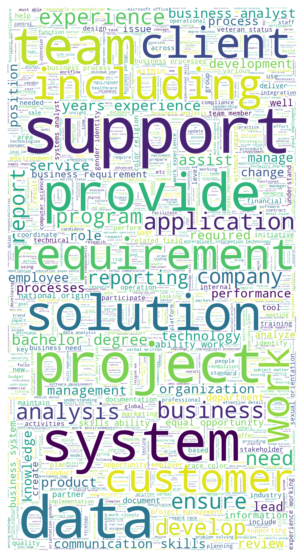

In [31]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()